# Customer Segmentation in Retail Industry

Once proverb said *Treat your customers like a King/Queen*, which mean that in industry, customer hold important role to boost the existence of industry it self. So, what kind of strategy that usually they are used in keep their customer?

Given example in Retail and Telco industry, we often find they give special promotion or offering to their customer. Usually, they treat differently in given special promotion/offering between loyal customer and new customer. So the next question is, how does they can differentiate the loyals and the other?

Machine learning is technology product that allow and help you to make great decision to your industry. The problem already state above can be solved with machine learning. You can do customer segmentation to know the loyal and new customer. Moreover, RFM will help you to answer some questions like `which customers are at the verge of churning?`, `who has the potential to be converted into more profitable customers?`, or `which customers you must retain?`.

RFM (Recency, Monetary, and Frequency) analysis is one method to do customer segmentation. RFM will do segmentation based on 3 important features :
1. Recency : Number of days since the last purchases
2. Frequency : Number of transaction made
3. Monetary : Amount of spent 

In this notebook we will learn how to build and analyze the RFM work and how it can be usefull to help us in decide wether the customer loyal or not. 
<img src='RFM.png' width=600 height=600/>

## Data Preparation

The data used is data from online retail in UK which can be found in this [link](https://www.kaggle.com/carrie1/ecommerce-data). This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

### Import Library and Read Data

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
ecom = pd.read_csv("data_input/data_ecom_uk.csv",encoding='latin1')

In [64]:
ecom.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
ecom.shape

(541909, 8)

This dataframe contains 8 variables that correspond to:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

### Get only transaction in UK

Since there were several data that not inside UK area, we need to filter the data that only from UK.

In [66]:
ecom_uk = ecom[ecom['Country']=='United Kingdom']
ecom_uk.shape

(495478, 8)

In [67]:
ecom_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Handle Missing Values

Missing values is a common problem in practical data. It is occur when there is no data stored inside variable/observation. We must be careful when treat missing values since we have to understand the reason why data goes missing.

In this result below we find that there are several missing data inside variable `Description` and `CustomerID`. `CustomerID` is one of important variable in RFM analysis, since this information contains uniq ID member from customer. Whilst, `Description` contains information about 

In [68]:
ecom_uk.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [69]:
ecom_uk[ecom_uk.isna().any(axis = 1)].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom


In [70]:
ecom_uk.dropna(inplace=True)

<ipython-input-70-61026bac6ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_uk.dropna(inplace=True)


In [71]:
ecom_uk.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [72]:
ecom_uk.shape

(361878, 8)

### Select Unique Transaction

Select unique transaction in each customer by delete the duplicated values

In [73]:
ecom_uk.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

<ipython-input-73-15e9cec117e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_uk.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)


### Change Data Types

In [74]:
ecom_uk.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [75]:
ecom_uk['InvoiceDate'] = pd.to_datetime(ecom_uk['InvoiceDate'])
ecom_uk['Country'] = ecom_uk['Country'].astype('category')
ecom_uk['CustomerID'] = ecom_uk['CustomerID'].astype('int64')

<ipython-input-75-cf31e1a1847b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_uk['InvoiceDate'] = pd.to_datetime(ecom_uk['InvoiceDate'])
<ipython-input-75-cf31e1a1847b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_uk['Country'] = ecom_uk['Country'].astype('category')
<ipython-input-75-cf31e1a1847b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

### Drop cancelled transaction

First character "C" in `InvoiceNo`, indicate that customers cancelled the transaction. So we need to delete since they have no meaning in our analysis.

In [76]:
ecom_uk = ecom_uk.loc[~ecom_uk.iloc[:,0].str.contains(r'C')]

In [77]:
ecom_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom


## Exploratory Data Analysis

Tahapan Exploratory Data Analysis digunakan untuk mengetahui pattern dari data.

### Recency

Recency will contains information about when customers do the last purchases. Recency value in each customer calculated with the maximum date purchases in the data minus date transaction in each customers.

In [78]:
ecom_uk['Date'] = ecom_uk['InvoiceDate'].dt.date

In [79]:
ecom_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12-01


In [80]:
last_trans = ecom_uk['Date'].max()
last_trans

datetime.date(2011, 12, 9)

In [81]:
recent = ecom_uk.groupby(by=['CustomerID'],  as_index=False)['Date'].max()

In [82]:
recent.columns = ['CustomerID','Last Transaction']
recent.head()

,CustomerID,Last Transaction
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


In [83]:
recent['Days Recent'] = last_trans - recent['Last Transaction']
recent['Days Recent'] = recent['Days Recent'].dt.days

In [84]:
recent.head()

,CustomerID,Last Transaction,Days Recent
0,12346,2011-01-18,325
1,12747,2011-12-07,2
2,12748,2011-12-09,0
3,12749,2011-12-06,3
4,12820,2011-12-06,3


In [85]:
recent.drop(columns=['Last Transaction'], inplace=True)

The output above shows columns `Day Recent` which contains information about the number of days since customers do the last purchases.

### Frequency

Frequency will contains information about how many transaction made by the customers

In [86]:
cust = len(ecom_uk['CustomerID'].value_counts())
cust

3921

In [87]:
transaction = len(ecom_uk['InvoiceNo'].value_counts())
transaction

16649

In [88]:
dat = {'num_customer':cust,'num_transaction':transaction}

In [89]:
table_trans = pd.DataFrame(data=dat, index=['count'])
table_trans

,num_customer,num_transaction
count,3921,16649


**Check Transaction from Each Customer**

In [90]:
temp = ecom_uk[['CustomerID','InvoiceNo']]

In [91]:
trans_cust = temp.groupby(by=['CustomerID']).count()
trans_cust.rename(columns={'InvoiceNo':'Number of Transaction'})
trans_cust.reset_index()

,CustomerID,InvoiceNo
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4
...,...,...
3916,18280,1
3917,18281,1
3918,18282,2
3919,18283,16


The result above shows information about number of transaction in each customer that calculated based on the number of invoices. So, the customer with ID 12346 have only made a one-time purchase, customer with ID 12747 make purchases 11 times, etc.

In [92]:
table_trans_details = temp.groupby(by=['CustomerID','InvoiceNo']).count()

This is the details invoice number in each transaction from each customer.

In [93]:
table_trans_details.head()

Empty DataFrame
Columns: []
Index: [(12346, 541431), (12747, 537215), (12747, 538537), (12747, 541677), (12747, 545321)]

### Monetary

Monetary will shows information about how much customers spend in their purchases. Thats can be calculated by multiply product unit price with number of quantity

In [94]:
ecom_uk['Total'] = ecom_uk['UnitPrice'] * ecom_uk['Quantity']
ecom_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,15.3
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12-01,11.1


In [95]:
monetary = ecom_uk.groupby(by=['CustomerID'], as_index=False)['Total'].sum()

In [96]:
monetary

,CustomerID,Total
0,12346,77183.60
1,12747,689.49
2,12748,3841.31
3,12749,98.35
4,12820,58.20
...,...,...
3916,18280,23.70
3917,18281,5.04
3918,18282,38.25
3919,18283,66.75


### Merge Column based on CustomerID

From the EDA process above let's concanate them together to be one informative dataframe.

In [97]:
new_ = monetary.merge(trans_cust,on='CustomerID')
new_data = new_.merge(recent,on='CustomerID')
new_data.rename(columns={'Total':'Monetary','InvoiceNo':'Frequency','Days Recent':'Recency'}, inplace=True)
new_data.head()

,CustomerID,Monetary,Frequency,Recency
0,12346,77183.60,1,325
1,12747,689.49,11,2
2,12748,3841.31,210,0
3,12749,98.35,5,3
4,12820,58.20,4,3


## Clustering Recency, Frequency, and Monetary

Clustering stage aims to group customers into several segments namely `low-value customer`, `medium-value customer` or `high-value customer`.

### Recency

In recency, customer with most recent purchases will be categorized in `high-value customer`. Why? Because customers with recently purchases are more likely to purchases again when compared to those who don't.

In [98]:
new_data['Recency'].describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

<AxesSubplot:>

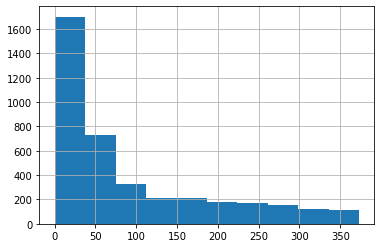

In [99]:
new_data['Recency'].hist()

<ipython-input-100-7aae48a71e8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_
<ipython-input-100-7aae48a71e8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_
<ipython-input-100-7aae48a71e8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

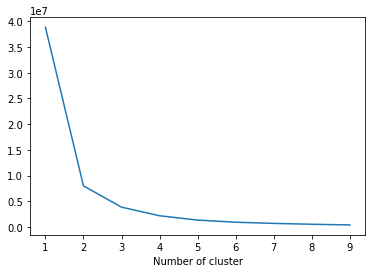

In [100]:
from sklearn.cluster import KMeans


sse={}
recency = new_data[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [101]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_data[['Recency']])
new_data['RecencyCluster'] = kmeans.predict(new_data[['Recency']])

In [102]:
new_data.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,723.0,154.673582,37.878377,94.0,121.0,155.0,186.00,222.0
1,2640.0,31.902273,25.336528,0.0,10.0,25.0,51.00,93.0
2,558.0,293.175627,45.309128,225.0,255.0,283.5,325.75,373.0


Cluster's result above show that cluster 1 contains the most recent customer, while cluster 0 are they who make old purchases. We need to reorder cluster, so there will be standarization that cluster 0 will contains `low-value customer`, cluster 1 `medium-value customer` and cluster 2 `high-value customer`.

Since this is recency steps, so customer with most recent purchases will categorized in cluster 2.

**Function to order cluster**

In [103]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

new_data = order_cluster('RecencyCluster', 'Recency',new_data,False)

### Frequency

The second most important factor is frequency. In frequency step, customer with most frequent purchases will categorized in `high-value customer`, since the higher the frequency, the higher is the chances of these responding to the offers.

In [104]:
new_data['Frequency'].describe()

count    3921.000000
mean        4.246111
std         7.205750
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: Frequency, dtype: float64

<AxesSubplot:>

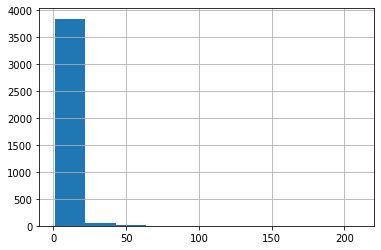

In [105]:
new_data['Frequency'].hist()

<ipython-input-106-0656d6293a81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency["clusters"] = kmeans.labels_
<ipython-input-106-0656d6293a81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency["clusters"] = kmeans.labels_
<ipython-input-106-0656d6293a81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

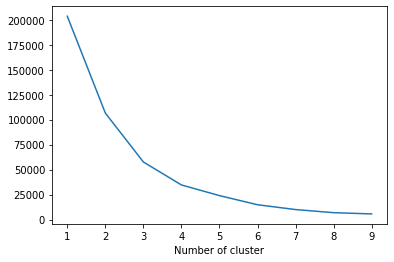

In [106]:
sse={}
frequency = new_data[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frequency)
    frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [107]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_data[['Frequency']])
new_data['FrequencyCluster'] = kmeans.predict(new_data[['Frequency']])
new_data.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3701.0,3.055931,2.540346,1.0,1.0,2.0,4.00,12.0
1,214.0,21.672897,10.177095,13.0,15.0,18.0,25.00,63.0
2,6.0,116.833333,47.562240,86.0,91.5,95.0,117.25,210.0


Reorder frequency cluster, so cluster 0 with low frequency purchases will categorized in `low-value customer` and cluster 2 with most frequency purchases will categorized in `high-values customer`.

In [108]:
new_data = order_cluster('FrequencyCluster', 'Frequency',new_data,True)

### Monetary

The third important factor is monetary. Monetary is amount of money these customer has spent. Customer with high monetary contribute more value to the business compared who's don't.

In [109]:
new_data['Monetary'].describe()

count      3921.000000
mean        293.299913
std        3261.756525
min           0.000000
25%          17.700000
50%          45.400000
75%         124.500000
max      168471.250000
Name: Monetary, dtype: float64

<AxesSubplot:>

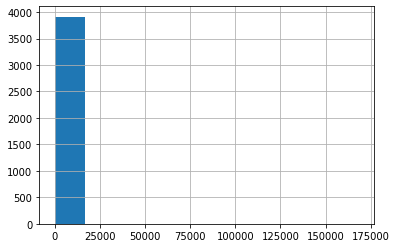

In [110]:
new_data['Monetary'].hist()

<ipython-input-111-63a61b3da261>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_["clusters"] = kmeans.labels_
<ipython-input-111-63a61b3da261>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_["clusters"] = kmeans.labels_
<ipython-input-111-63a61b3da261>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

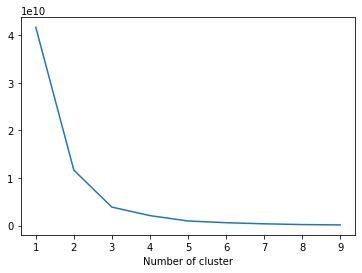

In [111]:
sse={}
monetary_ = new_data[['Monetary']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(monetary_)
    monetary_["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [112]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_data[['Monetary']])
new_data['MonetaryCluster'] = kmeans.predict(new_data[['Monetary']])
new_data.groupby('MonetaryCluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3914.0,189.384371,712.979643,0.00,17.5875,45.300,123.200,17895.28
1,1.0,168471.250000,NaN,168471.25,168471.2500,168471.250,168471.250,168471.25
2,6.0,40051.213333,19522.938794,24384.92,27576.6500,34958.095,41519.325,77183.60


Reorder recency cluster, so cluster 0 with low spent purchases will categorized in `low-value customer` and cluster 2 with most spent purchases will categorized in `high-values customer`.

In [113]:
new_data = order_cluster('MonetaryCluster', 'Monetary',new_data,True)

## Segmentation Customer based on Cluster

After get ordered cluster in each factor, the next step is put a label in each customer based on clustering score.

In [114]:
new_data.head()

,CustomerID,Monetary,Frequency,Recency,RecencyCluster,FrequencyCluster,MonetaryCluster
0,12346,77183.60,1,325,0,0,1
1,15098,39916.50,3,182,1,0,1
2,16029,24384.92,63,38,2,1,1
3,17450,26768.97,46,8,2,1,1
4,17949,29999.69,45,1,2,1,1


In [56]:
new_data.loc[new_data['CustomerID']==12747]

,CustomerID,Monetary,Frequency,Recency,RecencyCluster,FrequencyCluster,MonetaryCluster,Score
562,12747,689.49,11,2,2,0,0,2


Clustering score calculated by adding cluster value in each factor. 

In [115]:
new_data['Score'] = new_data['RecencyCluster'] + new_data['FrequencyCluster'] + new_data['MonetaryCluster']
new_data.head(2)

,CustomerID,Monetary,Frequency,Recency,RecencyCluster,FrequencyCluster,MonetaryCluster,Score
0,12346,77183.6,1,325,0,0,1,1
1,15098,39916.5,3,182,1,0,1,2


In [116]:
print(new_data['Score'].min())
print(new_data['Score'].max())

0
4


Minimum score from the data is 0 and the maximum score is 4. So for the label, customer with score less than equal to 1 will include in `low-value customer`, customer with score less than equal 3 include in `medium-value customer` and otherwise include in `high-value customer`.

In [117]:
label = []

def label_(data) :
    if data <= 1 :
        lab = "Low"
    elif data <= 3 :
        lab = "Medium"
    else :
        lab = "High"
    label.append(lab)

In [121]:
new_data['Score'].apply(label_)

0       None
1       None
2       None
3       None
4       None
        ... 
3916    None
3917    None
3918    None
3919    None
3920    None
Name: Score, Length: 3921, dtype: object

In [122]:
new_data['Label'] = label

In [123]:
new_data.head(2)

,CustomerID,Monetary,Frequency,Recency,RecencyCluster,FrequencyCluster,MonetaryCluster,Score,Label
0,12346,77183.6,1,325,0,0,1,1,Low
1,15098,39916.5,3,182,1,0,1,2,Medium


## Customer's behavior in each factor based on their label

With the existing label in each customer, management will be quite helpful in campaign targeting for their market. But, you should consider that behavior in each factor will lead the difference treatment in each market campaign.
For example, you can give free product or cashback to the customer with `high-value` label which spent high monetary value in their purchases. Or in other way, you can give discount and promotion to the customer which have high recency value, so they will interest to purchase again in the next time.

In this step, we try to understand customer behavior in each factor based on their label.

In [133]:
import numpy as np

def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

new_data['Recency'] = [neg_to_zero(x) for x in new_data.Recency]
new_data['Monetary'] = [neg_to_zero(x) for x in new_data.Monetary]

rfm_log = new_data[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [134]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

rfm_scaled = pd.DataFrame(rfm_scaled, index = new_data.index, columns = rfm_log.columns)

In [135]:
rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.389971,-1.049966,4.788147
1,0.996792,0.170733,4.359157
2,-0.064790,3.551812,4.038228
3,-1.121628,3.203041,4.098768
4,-2.530970,3.178605,4.172979


In [136]:
rfm_scaled['Label'] = new_data.Label
rfm_scaled['CustomerID'] = new_data.CustomerID

In [137]:
rfm_scaled

,Recency,Frequency,Monetary,Label,CustomerID
0,1.389971,-1.049966,4.788147,Low,12346
1,0.996792,0.170733,4.359157,Medium,15098
2,-0.064790,3.551812,4.038228,High,16029
3,-1.121628,3.203041,4.098768,High,17450
4,-2.530970,3.178605,4.172979,High,17949
...,...,...,...,...,...
3916,-2.061189,4.031650,3.055261,High,13089
3917,-2.530970,3.984999,1.973998,High,14606
3918,-2.530970,3.960563,2.967380,High,15311
3919,-2.530970,4.303780,2.165383,High,17841


In [138]:
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'Label'], \
                     var_name = 'Metrics', value_name = 'Value')

In [139]:
rfm_melted

,CustomerID,Label,Metrics,Value
0,12346,Low,Recency,1.389971
1,15098,Medium,Recency,0.996792
2,16029,High,Recency,-0.064790
3,17450,High,Recency,-1.121628
4,17949,High,Recency,-2.530970
...,...,...,...,...
11758,13089,High,Monetary,3.055261
11759,14606,High,Monetary,1.973998
11760,15311,High,Monetary,2.967380
11761,17841,High,Monetary,2.165383


Make a visualization for a better understanding.

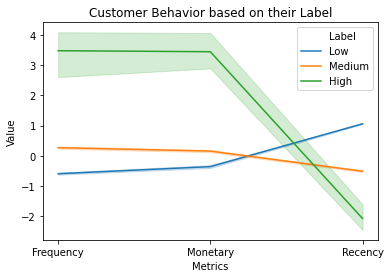

In [141]:
import seaborn as sns

# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'Label', data = rfm_melted)
plt.title('Customer Behavior based on their Label')
plt.legend(loc = 'upper right')

From behavior visualization above we get the information as a follows :

1. Customer with `high-value` labels have a tendency in spend much money (high monetary) and make frequent purchases (high frequency)
2. Customer with `medium-value` labels do not make frequent purchases nor spent much money.
3. Customer with `low-value` labels only spend a little money, do not make frequent purchases, but recently make a purchases than others.

Based on these above rules, management or marketing team can consider to :

1. Give special promotion or discount for `low-value` customers who have recently purchase in our store, so they interest to purchase again in the next time.
2. Give free product for `high-value` customer who spent much money and frequently make purchases in our store.
3. Retain the `medium-value` customer by giving a cashback in their purchases.

## Conclusion

RFM analysis is most widely used technique for selecting the most significant customers by labeling the customer based on their behavior. This technique help management in answer many business question, for example how to decide the best marketing campaign to retain the loyal customer and engage the new customer.